## Imports

In [2934]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2935]:
#  Import data

In [2936]:
train_data=pd.read_csv('train.csv')

In [2937]:
test=pd.read_csv('test.csv')

## Preprocessing


In [2938]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [2939]:
train=train_data[['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']]

In [2940]:
data=pd.concat([train,test])
data['Ind']=range(0,2919)
data.set_index('Ind',inplace=True)

In [2941]:
data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Ind,,,,,,,,,,,,,,,,,,,,,
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [2942]:
data.tail(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Ind,,,,,,,,,,,,,,,,,,,,,
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2918,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


## Missing data handling

In [2943]:
# Collecting the features which have missing data

miss_cols={}
del_cols={}
miss_dict=dict(data.isnull().sum()>0) 
for i in miss_dict:
    if ( (miss_dict[i]) & (data[i].isnull().sum()<100) ):
        miss_cols.update({i:data[i].isnull().sum()})
    elif data[i].isnull().sum()>0:
        del_cols.update({i:data[i].isnull().sum()})
    

In [2944]:
# Columns need to be deleted

data.drop(axis=1,columns=del_cols,inplace=True)
del_cols

{'Alley': 2721,
 'Fence': 2348,
 'FireplaceQu': 1420,
 'GarageCond': 159,
 'GarageFinish': 159,
 'GarageQual': 159,
 'GarageType': 157,
 'GarageYrBlt': 159,
 'LotFrontage': 486,
 'MiscFeature': 2814,
 'PoolQC': 2909}

In [2945]:
# Missing data columns

miss_cols

{'BsmtCond': 82,
 'BsmtExposure': 82,
 'BsmtFinSF1': 1,
 'BsmtFinSF2': 1,
 'BsmtFinType1': 79,
 'BsmtFinType2': 80,
 'BsmtFullBath': 2,
 'BsmtHalfBath': 2,
 'BsmtQual': 81,
 'BsmtUnfSF': 1,
 'Electrical': 1,
 'Exterior1st': 1,
 'Exterior2nd': 1,
 'Functional': 2,
 'GarageArea': 1,
 'GarageCars': 1,
 'KitchenQual': 1,
 'MSZoning': 4,
 'MasVnrArea': 23,
 'MasVnrType': 24,
 'SaleType': 1,
 'TotalBsmtSF': 1,
 'Utilities': 2}

### 'BsmtCond'

In [2946]:
data['BsmtCond'].value_counts()

TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

In [2947]:
data['BsmtCond'].fillna(value='TA',inplace=True)

In [2948]:
data['BsmtCond'].isnull().sum()

0

### 'BsmtExposure'

In [2949]:
data['BsmtExposure'].value_counts()

No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64

In [2950]:
data['BsmtExposure'].fillna(value='No',inplace=True)

In [2951]:
data['BsmtExposure'].isnull().sum()

0

### 'BsmtFinSF1' &  'BsmtFinType2'

In [2952]:
data['BsmtFinSF2'].fillna(value=0.0,inplace=True)

In [2953]:
data['BsmtFinSF1'].fillna(value=0.0,inplace=True)

In [2954]:
data['BsmtFinSF1'].isnull().sum()

0

In [2955]:
data['BsmtFinSF2'].isnull().sum()

0

### 'BsmtFinType1' & 'BsmtFinType2'

In [2956]:
data['BsmtFinType1'].value_counts()

Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64

In [2957]:
data['BsmtFinType1'].fillna(value='Unf',inplace=True)

In [2958]:
data['BsmtFinType2'].value_counts()

Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

In [2959]:
data['BsmtFinType2'].fillna(value='Unf',inplace=True)

###  'BsmtFullBath' & 'BsmtHalfBath'

In [2960]:
data['BsmtFullBath'].value_counts()

0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64

In [2961]:
data[data['BsmtFullBath'].isnull()]['BsmtCond']

Ind
2120    TA
2188    TA
Name: BsmtCond, dtype: object

In [2962]:
data['BsmtFullBath'].fillna(value=0.0,inplace=True)

In [2963]:
data['BsmtHalfBath'].value_counts()

0.0    2742
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64

In [2964]:
data[data['BsmtHalfBath'].isnull()]['BsmtCond']

Ind
2120    TA
2188    TA
Name: BsmtCond, dtype: object

In [2965]:
data['BsmtHalfBath'].fillna(value=0.0,inplace=True)

### BsmtQual

In [2966]:
data['BsmtQual'].value_counts()

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

In [2967]:
data['BsmtQual'].fillna('TA',inplace=True)

In [2968]:
data['BsmtQual'].isnull().sum()

0

### 'BsmtUnfSF'

In [2969]:
data['BsmtUnfSF'].value_counts()

0.0       241
384.0      19
728.0      14
672.0      13
600.0      12
572.0      11
216.0      11
100.0      11
816.0      11
624.0      10
270.0      10
300.0      10
264.0       9
396.0       9
280.0       9
186.0       9
768.0       9
780.0       8
546.0       8
348.0       8
294.0       8
440.0       8
162.0       8
480.0       8
832.0       8
108.0       8
840.0       8
784.0       7
80.0        7
392.0       7
         ... 
127.0       1
795.0       1
214.0       1
1098.0      1
584.0       1
532.0       1
983.0       1
79.0        1
388.0       1
559.0       1
1616.0      1
889.0       1
1078.0      1
1411.0      1
999.0       1
659.0       1
709.0       1
1214.0      1
657.0       1
587.0       1
1146.0      1
2140.0      1
579.0       1
735.0       1
1073.0      1
1503.0      1
445.0       1
958.0       1
1559.0      1
1369.0      1
Name: BsmtUnfSF, Length: 1135, dtype: int64

In [2970]:
data['BsmtUnfSF'].fillna(value=0.0,inplace=True)

### 'Electrical'

In [2971]:
data['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [2972]:
data['Electrical'].fillna(value='SBrkr',inplace=True)

### 'Exterior1st'

In [2973]:
data['Exterior1st'].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [2974]:
data['Exterior1st'].fillna(value='VinylSd',inplace=True)

### 'Exterior2nd'

In [2975]:
data['Exterior2nd'].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [2976]:
data['Exterior2nd'].fillna(value='VinylSd',inplace=True)

### 'Functional'

In [2977]:
data['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [2978]:
data['Functional'].fillna(value='Typ',inplace=True)

### 'GarageArea'

In [2979]:
data[data['GarageArea'].isnull()]['GarageCars']

Ind
2576   NaN
Name: GarageCars, dtype: float64

In [2980]:
data['GarageArea'].fillna(value=0.0,inplace=True)

### 'GarageCars'

In [2981]:
data['GarageCars'].value_counts()

2.0    1594
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
Name: GarageCars, dtype: int64

In [2982]:
data[data['GarageCars'].isnull()]['GarageArea']

Ind
2576    0.0
Name: GarageArea, dtype: float64

In [2983]:
data['GarageCars'].fillna(0.0,inplace=True)

### 'KitchenQual'

In [2984]:
data['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [2985]:
data[data['KitchenQual'].isnull()]['KitchenAbvGr']

Ind
1555    1
Name: KitchenAbvGr, dtype: int64

In [2986]:
data['KitchenAbvGr'].value_counts()

1    2785
2     129
0       3
3       2
Name: KitchenAbvGr, dtype: int64

In [2987]:
data[data['KitchenAbvGr']==1]['KitchenQual'].value_counts()

TA    1372
Gd    1146
Ex     205
Fa      61
Name: KitchenQual, dtype: int64

In [2988]:
data['KitchenQual'].fillna(value='TA',inplace=True)

### 'MSZoning'

In [2989]:
data['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [2990]:
data['MSZoning'].fillna(value='RL',inplace=True)

### 'MasVnrArea'

In [2991]:
data['MasVnrArea'].value_counts()

0.0       1738
120.0       15
176.0       13
200.0       13
216.0       12
180.0       12
144.0       11
72.0        11
108.0       11
16.0        11
340.0       10
80.0         9
210.0        9
128.0        9
196.0        9
256.0        8
178.0        8
40.0         8
302.0        8
170.0        8
132.0        8
260.0        7
300.0        7
203.0        7
186.0        7
456.0        7
420.0        7
50.0         7
252.0        7
106.0        7
          ... 
81.0         1
528.0        1
91.0         1
87.0         1
97.0         1
63.0         1
408.0        1
47.0         1
39.0         1
118.0        1
1170.0       1
376.0        1
584.0        1
322.0        1
634.0        1
532.0        1
1290.0       1
519.0        1
287.0        1
571.0        1
435.0        1
886.0        1
237.0        1
738.0        1
1050.0       1
664.0        1
247.0        1
550.0        1
137.0        1
572.0        1
Name: MasVnrArea, Length: 444, dtype: int64

In [2992]:
len(data[data['MasVnrArea'].isnull()]['MasVnrType']==np.nan)

23

In [2993]:
data['MasVnrArea'].fillna(value=0.0,inplace=True)

###  'MasVnrType'

In [2994]:
data['MasVnrType'].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [2995]:
data['MasVnrType'].fillna('None',inplace=True)

### 'SaleType'

In [2996]:
data['SaleType'].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [2997]:
data['SaleType'].fillna('WD',inplace=True)

### 'TotalBsmtSF'

In [2998]:
data['TotalBsmtSF'].value_counts()

0.0       78
864.0     74
672.0     29
912.0     26
1040.0    25
768.0     24
816.0     23
728.0     20
1008.0    19
780.0     19
384.0     19
960.0     18
894.0     17
756.0     17
832.0     17
546.0     16
936.0     16
720.0     16
600.0     16
848.0     16
483.0     14
630.0     13
952.0     13
840.0     13
988.0     12
624.0     12
876.0     11
784.0     11
796.0     11
1056.0    10
          ..
1967.0     1
1905.0     1
1679.0     1
1533.0     1
2140.0     1
1994.0     1
1378.0     1
763.0      1
1047.0     1
1376.0     1
904.0      1
370.0      1
1570.0     1
2033.0     1
1709.0     1
1519.0     1
2077.0     1
1550.0     1
797.0      1
699.0      1
559.0      1
396.0      1
1866.0     1
1641.0     1
961.0      1
1949.0     1
1231.0     1
1829.0     1
1475.0     1
1243.0     1
Name: TotalBsmtSF, Length: 1058, dtype: int64

In [2999]:
data[data['TotalBsmtSF'].isnull()]['BsmtCond']

Ind
2120    TA
Name: BsmtCond, dtype: object

In [3000]:
data['TotalBsmtSF'].fillna(0.0,inplace=True)

### 'Utilities'

In [3001]:
data['Utilities'].isnull().sum()

2

In [3002]:
data['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [3003]:
data['Utilities'].fillna('AllPub',inplace=True)

## Categorical to Numerical

data.info()

In [3004]:
type(data['YrSold'][0])

numpy.int64

In [3005]:
num_cols=[]
for i in data.columns:
    if type(data[i][0])==np.int64:
        num_cols.append(i)
    

In [3006]:
from sklearn.preprocessing import LabelEncoder,LabelBinarizer

In [3007]:
def cat_num(cat):
    global data
    if len(data[cat].value_counts())==2:
        data[cat]=LabelEncoder().fit_transform(data[cat])
    elif len(data[cat].value_counts())>2:
        lb=LabelBinarizer()
        lbr=lb.fit_transform(data[cat])
        lbd=pd.DataFrame(data=lbr,columns=lb.classes_)
        data=pd.concat([data,lbd],axis=1)
        data.drop(columns=cat,inplace=True)

In [3008]:
cat_cols=[]
for i in data.columns:
    if type(data[i][0])==str:
        #cat_num(i)
        cat_cols.append(i)
        

## Category columns handling

In [3009]:
cat_cols[0]

'MSZoning'

### 'MSZoning'

In [3010]:
data['MSZoning'].value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

Density of population increases the house prices.so 

       C	Commercial--->10
       RH	Residential High Density--->8
       RM	Residential Medium Density--->6
       RL	Residential Low Density--->4
       FV	Floating Village Residential--->2
       
       

In [3011]:
replace_map={'MSZoning': {'C (all)': 10, 'RH': 8, 'RM': 6, 'RL': 4, 'FV':2}}

In [3012]:
data.replace(replace_map,inplace=True)

In [3013]:
data['MSZoning'].value_counts()

4     2269
6      460
2      139
8       26
10      25
Name: MSZoning, dtype: int64

### 

In [3014]:
data[cat_cols[5]].value_counts()

Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

In [3015]:
replace_map={'LotConfig': {'FR3': 10, 'FR2': 8, 'Corner': 6, 'Inside': 4,'CulDSac':2}}

In [3016]:
data.replace(replace_map,inplace=True)

In [3017]:
data[cat_cols[6]].value_counts()

Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64

In [3018]:
replace_map={'LandSlope': {'Gtl': 10, 'Mod': 5, 'Sev': 0}}

In [3019]:
data.replace(replace_map,inplace=True)

In [3020]:
data[cat_cols[8]].value_counts()

Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64

Condition1: Proximity to various conditions

	   PosN	  Near positive off-site feature--park, greenbelt, etc. --->10
       PosA	  Adjacent to postive off-site feature  --->8
       Artery	Adjacent to arterial street--->7
       Feedr	Adjacent to feeder street-->6	
       Norm	Normal-->5	
       RRAn	Adjacent to North-South Railroad--->3
       RRAe	Adjacent to East-West Railroad--->3
       RRNn	Within 200 of North-South Railroad--->1
       RRNe	Within 200 of East-West Railroad--->1
       

In [3021]:
replace_map={'Condition1':{'PosN':10, 'PosA':8,'Artery':5,'Feedr':6,'Norm':7,'RRAn':3,'RRAe':3,'RRNn':1,'RRNe':1},
            'Condition2':{'PosN':10, 'PosA':8,'Artery':5,'Feedr':6,'Norm':7,'RRAn':3,'RRAe':3,'RRNn':1,'RRNe':1}}

In [3022]:
data.replace(replace_map,inplace=True)

In [3023]:
data['Conditions']=data['Condition1']+data['Condition2']

In [3024]:
data.drop(columns=['Condition1'],inplace=True)
data.drop(columns=['Condition2'],inplace=True)

In [3025]:
data['BldgType'].value_counts()

1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64

BldgType: Type of dwelling
		
       Duplx	Duplex  --->10
       TwnhsE	Townhouse End Unit --->8  
       TwnhsI	Townhouse Inside Unit --->6
       2FmCon	Two-family Conversion; originally built as one-family dwelling--->4
       1Fam	Single-family Detached--->2

In [3026]:
replace_map={'BldgType':{'Duplex':10,'TwnhsE':8,'Twnhs':6,'2fmCon':4,'1Fam':2}}

In [3027]:
data.replace(replace_map,inplace=True)

data[cat_cols[11]].value_counts()

HouseStyle: Style of dwelling

	   SFoyer	Split Foyer--->10
       SLvl	  Split Level--->9
       2.5Fin	Two and one-half story: 2nd level finished--->8
       2Story	Two story--->7
       2.5Unf	Two and one-half story: 2nd level unfinished--->6
       1.5Fin	One and one-half story: 2nd level finished--->5
       1.5Unf	One and one-half story: 2nd level unfinished--->4
       1Story	One story--->3

       

       


In [ ]:
replace_map={'HouseStyle'{'SFoyer':4,'SLvl':7,'2.5Fin':10,'2Story':9,'2.5Unf':8,'1.5Fin':6,'1.5Unf':5,'1Story':3}}m

In [ ]:
data.replace(replace_map,inplace=True)

data['Foundation'].value_counts()

Foundation: Type of foundation

       PConc	Poured Contrete--->10
	   Stone	Stone--->8
       Slab	Slab--->9
       BrkTil	Brick & Tile--->7
       CBlock	Cinder Block--->6
       Wood	Wood--->5

replace_map={'Foundation':{'PConc':9,'Slab':10,'Stone':8,'BrkTil':7,'CBlock':6,'Wood':5}}

data.replace(replace_map,inplace=True)

In [3028]:
data[cat_cols[17]].value_counts()

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent -->10
       Gd	Good-->8
       TA	Average/Typical-->6
       Fa	Fair-->4
       Po	Poor-->2

In [3029]:
replace_map={'ExterQual':{'Ex':10,'Gd':8,'TA':6,'Fa':4,'Po':2}}

In [3030]:
data.replace(replace_map,inplace=True)

In [3031]:
data[cat_cols[18]].value_counts()

TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64

In [3032]:
replace_map={'ExterCond':{'Ex':10,'Gd':8,'TA':6,'Fa':4,'Po':2}}

In [3033]:
data.replace(replace_map,inplace=True)

In [3034]:
data[cat_cols[20]].value_counts()

TA    1364
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

In [3035]:
replace_map={'BsmtQual':{'Ex':10,'Gd':8,'TA':6,'Fa':4,'Po':2}}

In [3036]:
replace_map={'BsmtQual':{'Ex':10,'Gd':8,'TA':6,'Fa':4,'Po':2}}

In [3037]:
data[cat_cols[21]].value_counts()

TA    2688
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

In [3038]:
replace_map={'BsmtCond':{'Ex':10,'Gd':8,'TA':6,'Fa':4,'Po':2}}

In [3039]:
data.replace(replace_map,inplace=True)

In [3040]:
data[cat_cols[22]].value_counts()

No    1986
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure --->10
       Av	Average Exposure (split levels or foyers typically score average or above)--->8
       Mn	Mimimum Exposure--->6
       No	No Exposure--->4
       NA	No Basement--->2
	

In [3041]:
replace_map={'BsmtExposure':{'Gd':10,'Av':8,'Mn':6,'No':4,'Na':2}}

In [3042]:
data.replace(replace_map,inplace=True)

In [3043]:
data[cat_cols[23]].value_counts()

Unf    930
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters-->10
       ALQ	Average Living Quarters-->5
       BLQ	Below Average Living Quarters-->4	
       Rec	Average Rec Room-->3
       LwQ	Low Quality-->2
       Unf	Unfinshed-->1
       NA	No Basement-->0

In [3044]:
replace_map={'BsmtFinType1':{'GLQ':10,'ALQ':6,'BLQ':5,'Rec':4,'LwQ':3,'Unf':2,'NA':1}}

In [3045]:
data.replace(replace_map,inplace=True)

In [3046]:
cat_cols=[]
for i in data.columns:
    if type(data[i][0])==str:
        cat_num(i)
        cat_cols.append(i)
        

In [3047]:
data.head(1)

,Id,MSSubClass,MSZoning,LotArea,Street,Utilities,LotConfig,LandSlope,BldgType,OverallQual,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
Ind,,,,,,,,,,,,,,,,,,,,,
0,1,60,4,8450,1,0,4,10,2,7,...,0,0,0,1,0,0,0,0,1,0


##  Outlier Detection

In [3048]:
def Outlier_Detecter(data,feature):
    Q1=data[feature].quantile(0.25)
    Q3=data[feature].quantile(0.75)
    IQR=Q3-Q1
    Lower_lim=Q1-1.5*IQR
    Upper_lim=Q3+1.5*IQR
    return len(data[(data[feature] < Lower_lim ) & (data[feature] > Upper_lim)])

In [3049]:
outliers=[]
for i in num_cols:
    len_out=Outlier_Detecter(data,i)
    if len_out >0:
        outliers.append(i)

In [3050]:
outliers

[]

**There is no outliers found**

###  Train Test Split

In [3051]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Utilities,LotConfig,LandSlope,BldgType,OverallQual,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
Ind,,,,,,,,,,,,,,,,,,,,,
0,1,60,4,8450,1,0,4,10,2,7,...,0,0,0,1,0,0,0,0,1,0
1,2,20,4,9600,1,0,8,10,2,6,...,0,0,0,1,0,0,0,0,1,0
2,3,60,4,11250,1,0,4,10,2,7,...,0,0,0,1,0,0,0,0,1,0
3,4,70,4,9550,1,0,6,10,2,7,...,0,0,0,1,1,0,0,0,0,0
4,5,60,4,14260,1,0,8,10,2,8,...,0,0,0,1,0,0,0,0,1,0


In [3052]:
print('Train dataset shape:{0}, \nTest dataset shape:{1}'.format(train.shape,test.shape))

Train dataset shape:(1460, 80), 
Test dataset shape:(1459, 80)


In [3053]:
data_copy=data.copy()

In [3054]:
data=data_copy.copy()

In [3055]:
train.index

RangeIndex(start=0, stop=1460, step=1)

In [3056]:
x_train=data[:1460]

x_train=x_train[num_cols]

In [3057]:
x_train.drop(columns='Id',inplace=True)

C:\Users\Nandhu\miniconda3\envs\study\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [3058]:
x_test=data[1460:]

x_test=x_test[num_cols]

In [3059]:
x_test.drop(columns='Id',inplace=True)

C:\Users\Nandhu\miniconda3\envs\study\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [3060]:
print('Train dataset shape:{0}, \nTest dataset shape:{1}'.format(x_train.shape,x_test.shape))

Train dataset shape:(1460, 198), 
Test dataset shape:(1459, 198)


In [3061]:
y_train=train_data['SalePrice']

In [3062]:
x_train.head(1)

,MSSubClass,MSZoning,LotArea,Street,Utilities,LotConfig,LandSlope,BldgType,OverallQual,OverallCond,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
Ind,,,,,,,,,,,,,,,,,,,,,
0,60,4,8450,1,0,4,10,2,7,5,...,0,0,0,1,0,0,0,0,1,0


In [3063]:
x_test.head(1)

,MSSubClass,MSZoning,LotArea,Street,Utilities,LotConfig,LandSlope,BldgType,OverallQual,OverallCond,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
Ind,,,,,,,,,,,,,,,,,,,,,
1460,20,8,11622,1,0,4,10,2,5,6,...,0,0,0,1,0,0,0,0,1,0


In [3064]:
y_train.head(1)

0    208500
Name: SalePrice, dtype: int64

##  Feature Selection

In [3065]:
from sklearn.feature_selection import SelectKBest, chi2

In [3066]:
kbest=SelectKBest(score_func=chi2,k=30)
kbestf=kbest.fit(x_train,y_train)

In [3067]:
len(kbestf.scores_)

198

In [3068]:
score=pd.DataFrame({'Score':kbestf.scores_,'Features':x_train.columns})

In [3069]:
kbest25=list(score.nlargest(246,columns='Score')['Features'])

In [3070]:
len(kbest25)

198

In [3071]:
x_train_f=x_train[kbest25]

In [3072]:
x_test_f=x_test[kbest25]

## Machine Learning

In [3073]:
from sklearn.linear_model import LinearRegression,Lasso,LogisticRegression
from xgboost import XGBRegressor

###  Linear Regression

In [3074]:
lr=LinearRegression()

In [3075]:
lrf=lr.fit(x_train_f,y_train)

In [3076]:
y_predict=lrf.predict(x_test_f)

In [3077]:
y_predict

array([111423.76780478, 144571.64460255, 182673.73520097, ...,
       167818.91473725, 102095.3107291 , 221412.30918921])

In [3078]:
'''Saving the results in Csv'''
data={'Id':range(1461,2920),'SalePrice':y_predict}
pd.DataFrame(data).set_index('Id').to_csv(r'submission files/submission_NH05.csv')

In [3105]:
best_score=pd.read_csv(r'submission files/submission_NH04.csv')

In [3106]:
a=best_score['SalePrice']-y_predict

C:\Users\Nandhu\miniconda3\envs\study\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


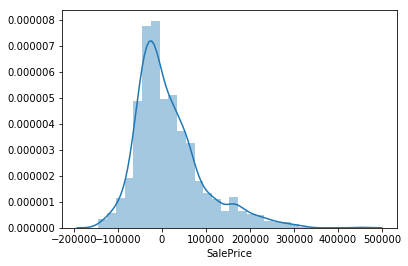

In [3107]:
#fig,ax1=plt.subplot(1,1)
sns.distplot(a,bins=30)


In [3108]:
best_score['new']=y_predict

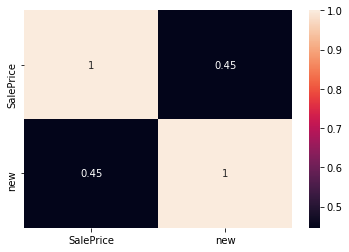

In [3109]:
sns.heatmap(best_score[['SalePrice','new']].corr(),annot=True)

### Random Forest Regressor

In [3084]:
from sklearn.ensemble import RandomForestRegressor

In [3085]:
rfs=RandomForestRegressor()

In [3086]:
svr=rfs.fit(x_train_f,y_train)

In [3087]:
y_predict=svr.predict(x_test_f)

In [3088]:
y_predict

array([126466.58, 157324.34, 179731.97, ..., 152990.96, 117139.34,
       223310.54])

Saving the results in Csv
data={'Id':range(1461,2920),'SalePrice':y_predict}
pd.DataFrame(data).set_index('Id').to_csv(r'submission files/submission_mhdLR.csv')

In [3089]:
best_score=pd.read_csv(r'submission files/submission_05dlr.csv')

In [3090]:
a=best_score['SalePrice']-y_predict

C:\Users\Nandhu\miniconda3\envs\study\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


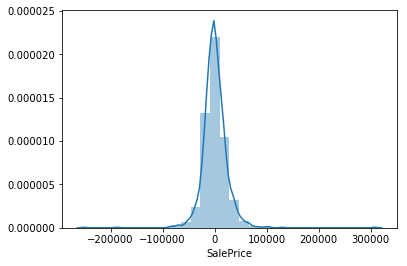

In [3091]:
#fig,ax1=plt.subplot(1,1)
sns.distplot(a,bins=30)


In [3092]:
best_score['new']=y_predict

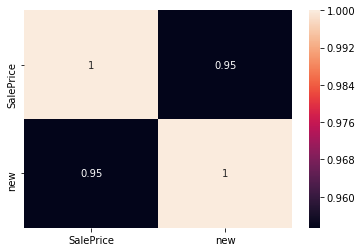

In [3093]:
sns.heatmap(best_score[['SalePrice','new']].corr(),annot=True)

## Support Vector Regressor

In [3094]:
from sklearn.svm import SVR

In [3095]:
svr=SVR()

In [3096]:
svr=svr.fit(x_train_f,y_train)

In [3097]:
y_predict=svr.predict(x_test_f)

In [3098]:
y_predict

array([163010.72817155, 163029.1792373 , 163041.6692038 , ...,
       163088.85927277, 162995.12277047, 162990.89023389])

In [3099]:
#  # Saving the results in Csv
data={'Id':range(1461,2920),'SalePrice':y_predict}
pd.DataFrame(data).set_index('Id').to_csv(r'submission files/submission_mhdLR.csv')

In [3100]:
best_score=pd.read_csv(r'submission files/submission_lr.csv')

In [3101]:
a=best_score['SalePrice']-y_predict

C:\Users\Nandhu\miniconda3\envs\study\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


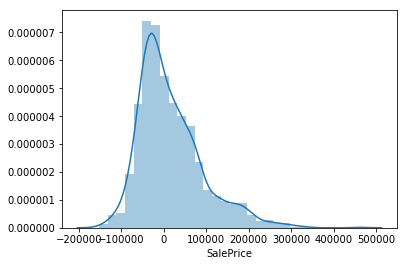

In [3102]:
#fig,ax1=plt.subplot(1,1)
sns.distplot(a,bins=30)


In [3103]:
best_score['new']=y_predict

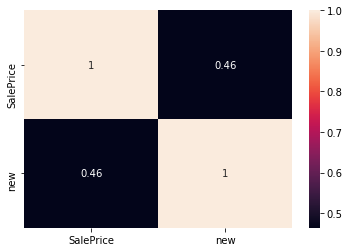

In [3104]:
sns.heatmap(best_score[['SalePrice','new']].corr(),annot=True)